<h1> MACD binance closing prices</h1>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
df=pd.read_csv('BTCUSDT.csv')

In [40]:
df=df.head(200)

In [52]:
# set a date as a index
#df=df.set_index(df['Date'])

In [53]:
close=df.Close

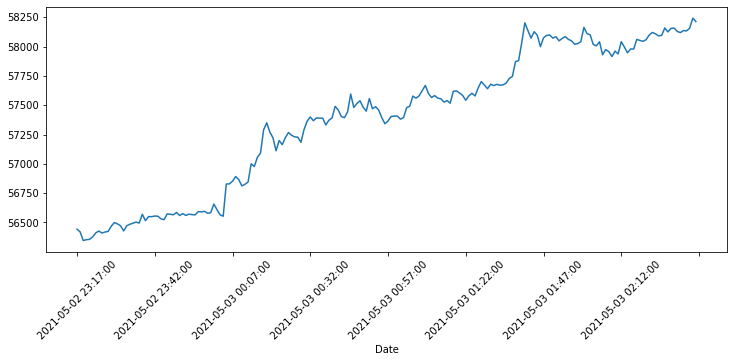

In [54]:
plt.figure(figsize=(12.2,4.5))
close.plot()
plt.xticks(rotation=45)
plt.show()

In [55]:
def macd(df):
    df['EMA12']=df.Close.ewm(span=12).mean()
    df['EMA26']=df.Close.ewm(span=26).mean()
    df['MACD']=df.EMA12 - df.EMA26
    df['signal']=df.MACD.ewm(span=9).mean()
    print('Done!')

In [56]:
macd(df)

Done!


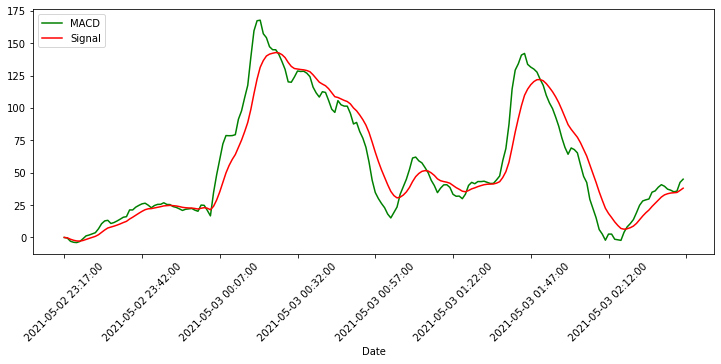

In [57]:
# plot MACS and signal data
plt.figure(figsize=(12.2,4.5))
#df.Close.plot(label='Close Price')
df.MACD.plot(label='MACD',color='green')
df.signal.plot(label='Signal',color='red')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [50]:
buy,sell=[],[]

for i in range(2,len(df)):
    if df.MACD.iloc[i] > df.signal.iloc[i] and df.MACD.iloc[i-1] < df.signal.iloc[i-1]:
        buy.append(i)
    elif df.MACD.iloc[i] < df.signal.iloc[i] and df.MACD.iloc[i-1] > df.signal.iloc[i-1]:
        sell.append(i)   

In [35]:
# set the data of the dataframe


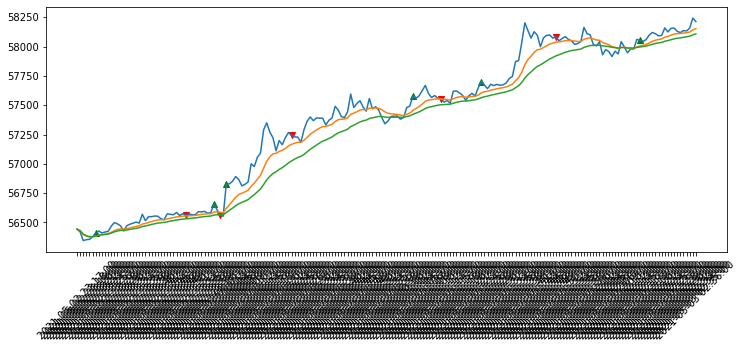

In [58]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df.Close)
plt.plot(df.EMA12)
plt.plot(df.EMA26)
#plt.plot(df.MACD)
plt.scatter(df.iloc[buy].index,df.iloc[buy].Close,marker='^',color='green')
plt.scatter(df.iloc[sell].index,df.iloc[sell].Close,marker='v',color='red')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index,df['Buy_Signal_Price'],color='green')
plt.show()

In [ ]:
df.Buy_Signal_Price